# Practical No 6 : Implement the PAGE Rank algorithm and analyze it.

PageRank is an algorithm used by Google Search to rank web pages in their search engine results. It measures the importance of a webpage based on the number and quality of links pointing to it. The underlying assumption is that more important pages are likely to receive more links from other important pages.

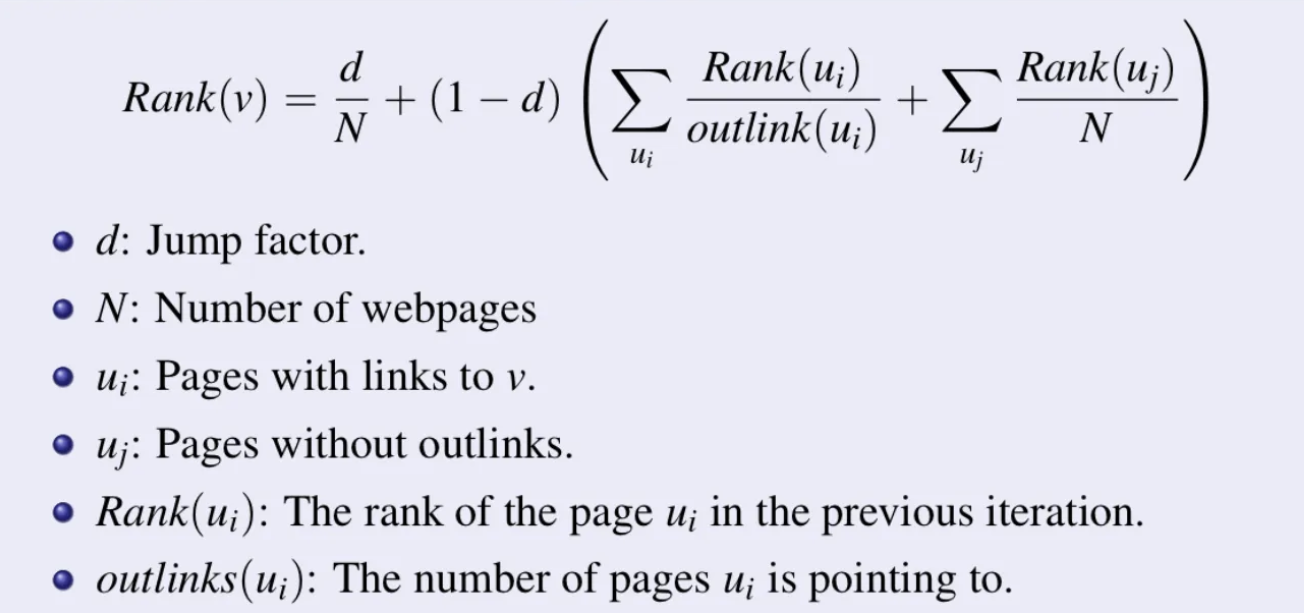

# Block Diagram

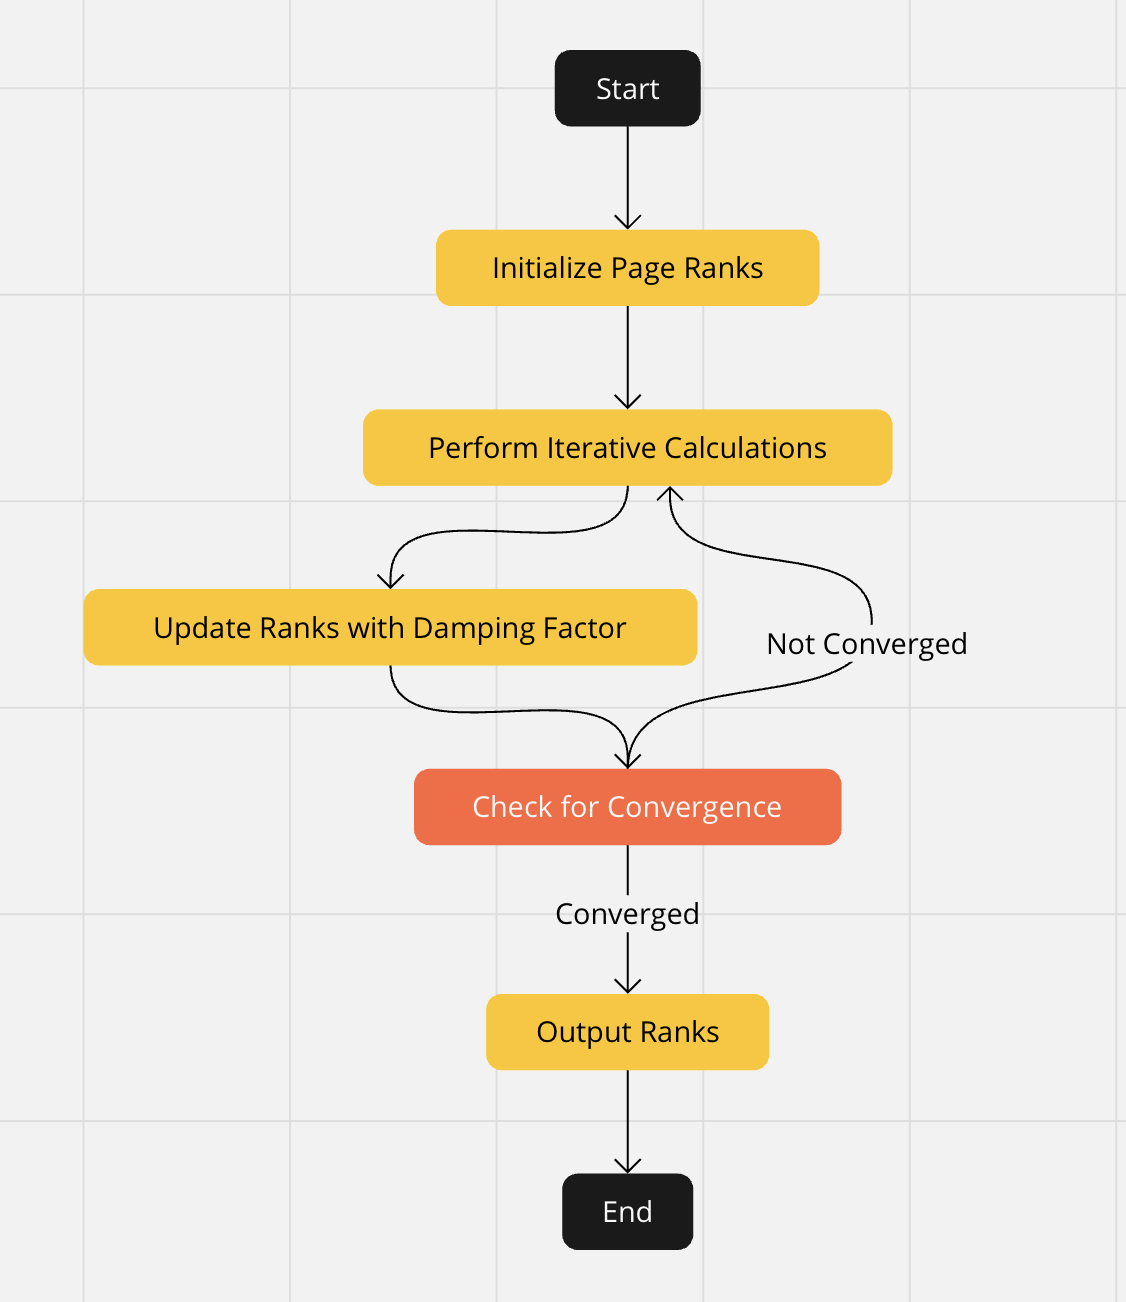

In [1]:
import numpy as np

In [2]:
def page_rank(links, damping=0.85, max_iterations=100, tol=1.0e-6):
    n = links.shape[0]
    column_sums = np.sum(links, axis=0)
    column_sums[column_sums == 0] = 1
    normalized_links = links / column_sums

    ranks = np.ones(n) / n
    teleport = (1 - damping) / n

    for iteration in range(max_iterations):
        new_ranks = teleport + damping * np.dot(normalized_links, ranks)

        if np.linalg.norm(new_ranks - ranks, 1) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        ranks = new_ranks

    return ranks

In [23]:
links = np.array([
    [0, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 0, 1],
    [1, 0, 0, 0],
], dtype=float)

In [24]:
scores = page_rank(links)
print("PageRank Scores:", scores)

Converged after 45 iterations.
PageRank Scores: [0.29721007 0.23343507 0.30554071 0.16381415]


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

(-1.030902963509557,
 1.0352899746004964,
 -0.677541548473842,
 1.1594044005337136)

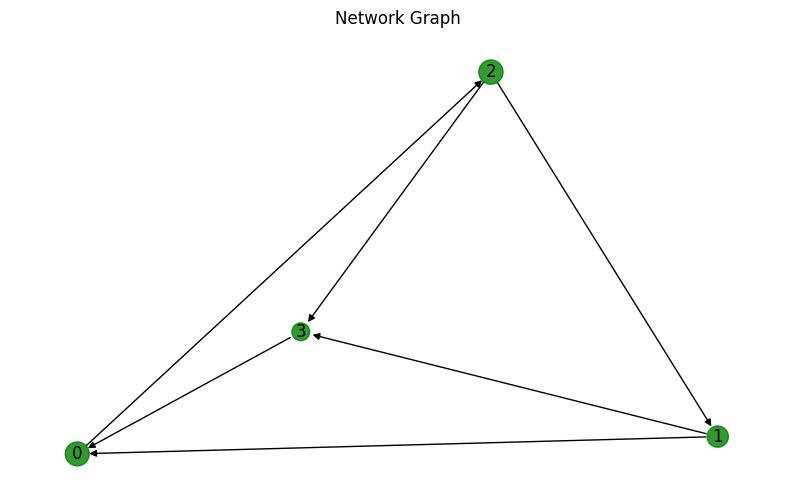

In [26]:
G = nx.from_numpy_array(links, create_using=nx.DiGraph)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
node_sizes = scores * 1000
nx.draw_networkx_nodes(G, pos, node_color='green', node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True)
nx.draw_networkx_labels(G, pos)
plt.title('Network Graph')
plt.axis('off')

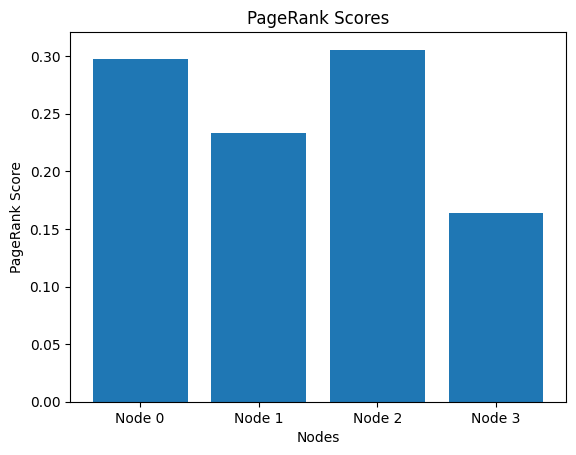

In [27]:
plt.bar(range(len(scores)), scores)
plt.title('PageRank Scores')
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')
plt.xticks(range(len(scores)), [f'Node {i}' for i in range(len(scores))])
plt.show()

In [28]:
for i, score in enumerate(scores):
  print(f"Node {i}: {score:.4f}")

Node 0: 0.2972
Node 1: 0.2334
Node 2: 0.3055
Node 3: 0.1638


# Analysis

Node 3 (0.3055) has the highest rank, meaning it is the most significant node in the network based on the connectivity structure.

Node 1 (0.2972) follows closely, indicating substantial importance.

Node 2 (0.2334) has a moderate rank.

Node 4 (0.1638) is the least significant, likely due to fewer or less influential incoming links.

# Conclusion

PageRank is a link analysis algorithm that effectively ranks web pages based on their importance within a network. It considers the quality and quantity of incoming links, with pages receiving links from authoritative sources gaining higher PageRank scores. This approach identifies valuable and informative content, ultimately influencing search engine results and user navigation on the web.